In [20]:
import pandas as pd
import numpy as np
from sklearn.neighbors import BallTree
from tabulate import tabulate

# Step 1: Load the dataset from Excel
# Replace 'your_dataset.xlsx' with your actual Excel file path
df = pd.read_excel("C:/Users/ODUOBUK/ANAMBRA_crosschecked_2.xlsx")

# Display the loaded dataframe to verify
print(df.head())  # Adjust as needed to view a sample of your data




     State     LGA        Ward       PU-Code              PU-Name  Latitude  \
0  ANAMBRA  AGUATA  ACHINA   I  04-01-01-001  ST. CHARLE'S SCHOOL  6.008584   
1  ANAMBRA  AGUATA  ACHINA   I  04-01-01-005       AMANKWU SQUARE  6.008584   
2  ANAMBRA  AGUATA  ACHINA   I  04-01-01-006     COOPERATIVE HALL  6.008584   
3  ANAMBRA  AGUATA  ACHINA   I  04-01-01-008      OCHIEOBU SQUARE  6.008584   
4  ANAMBRA  AGUATA  ACHINA   I  04-01-01-010   OYE MOTOR PARK  II  5.965620   

   Longitude  Accredited_Voters  Registered_Voters  Results_Found  ...  \
0   7.100949                171                630           True  ...   
1   7.100949                153                500           True  ...   
2   7.100949                121                386           True  ...   
3   7.100949                134                426           True  ...   
4   7.119106                 63                166           True  ...   

   Result_Sheet_Stamped  Result_Sheet_Corrected  Result_Sheet_Invalid  \
0      

In [21]:


# Step 2: Define function to calculate neighbours

def find_neighbours(df, radius_km=1):
    coordinates = df[['Latitude', 'Longitude']].values
    # Convert degrees to radians for haversine metric
    coordinates = np.radians(coordinates)
    tree = BallTree(coordinates, metric='haversine')
    neighbours = tree.query_radius(coordinates, r=radius_km / 6371)  # Radius in radians
    
    # Create a DataFrame to save the neighbours
    neighbours_df = pd.DataFrame({
        'PU-Code': df['PU-Code'],
        'Neighbours': [list(unit) for unit in neighbours]
    })
    neighbours_df.to_csv('neighbours.csv', index=False)
    
    return neighbours

print(neighbours)


[array([   1,    2,    3,    7,    8,    9,   45,   44,  219,  218,    6,
        2967,    0,   47,   46,   10,   13,   14,   15,   16,   17,   18,
          19,   20,   22,   23,   24,   25,   26,   27,   29,   30,   31,
          32,   37,   38,   39,   41,   42,   36,   43,   59,   48,   40,
          49,   50,   63,   64,   66,   60,   54,   55,   53,   35,   52,
          51,   67,   68,   69,   70,   71,   72,   74,   75,   76,   77,
          78,   82,   83,   84,   85,   86,   87,   88,  116,  115,  133,
         112,  110,  127,  122,   90,   91,   92,   93,   94,  100,  101,
         105,  103,  102,   95,   96,   97,   98,   89,   99,  107,  106,
         108,  118,  119,  129,  135,  131,  134,  130,  109,  124,  111,
         128,  123,  132,  136,  137,  138,  139,  140,  141,  142,  143,
         144,  147,  148,  149,  150,  151,  152,  153,  155,  157,  158,
         159,  160,  161,  162,  163,  164,  165,  167,  168,  182,  181,
         180,  179,  178,  177,  175, 

In [22]:

# Step 3: Calculate outlier scores

def calculate_outlier_scores(df, neighbours):
    outlier_scores = []
    for i, unit in enumerate(neighbours):
        neighbour_indices = unit[unit != i]  # Exclude self from neighbours
        neighbour_data = df.iloc[neighbour_indices]
        mean_votes = neighbour_data[['APC', 'LP', 'PDP', 'NNPP']].mean()
        unit_votes = df.iloc[i][['APC', 'LP', 'PDP', 'NNPP']]
        score = abs(mean_votes - unit_votes).sum()  # Sum of absolute differences
        outlier_scores.append(score)
    
    # Save the outlier scores
    outlier_scores_df = pd.DataFrame({
        'PU-Code': df['PU-Code'],
        'Outlier Score': outlier_scores
    })
    outlier_scores_df.to_csv('outlier_scores.csv', index=False)
    
    return outlier_scores

print(outlier_scores)

[104.62500000000001, 48.224999999999994, 104.62500000000001, 27.345833333333324, 46.0, 46.0, 43.37083333333334, 16.054166666666667, 57.00416666666666, 77.77083333333333, 20.533333333333324, 24.66666666666666, 80.0, 22.541666666666657, 39.354166666666664, 2.783333333333339, 60.2375, 50.4, 45.95833333333333, 46.383333333333326, 46.383333333333326, 13.0, 44.62083333333334, 160.69166666666666, 135.5875, 64.29166666666666, 7.016666666666665, 74.50000000000001, 45.75, 18.087500000000002, 35.699999999999996, 33.32916666666666, 8.483333333333334, 35.0, 35.0, 94.62083333333334, 94.62083333333334, 31.78333333333333, 24.329166666666662, 27.137500000000006, 4.995833333333336, 35.595833333333324, 24.329166666666676, 21.112499999999994, 33.397489539748946, 6.2845188284518825, 31.75732217573222, 27.740585774058577, 12.241666666666664, 11.237499999999997, 11.2375, 24.29166666666666, 32.325, 104.62500000000001, 157.10000000000002, 135.00833333333335, 333.0, 130.5, 463.5, 195.8375, 128.34166666666667, 1

In [23]:

# Step 4: Main function to perform outlier detection

def outlier_detection(df):
    neighbours = find_neighbours(df)
    outlier_scores = calculate_outlier_scores(df, neighbours)
    df['Outlier Score'] = outlier_scores  # Add outlier scores to dataframe
    sorted_df = df.sort_values(by='Outlier Score', ascending=False)
    
    # Print the dataframe in tabular format
    print(tabulate(sorted_df.head(), headers='keys', tablefmt='psql'))
    
    # Save the sorted results
    sorted_df.to_csv('outlier_results.csv', index=False)
    
    return sorted_df

In [24]:
# Step 5: Execute outlier detection and save results
df_with_outliers = outlier_detection(df)


+------+---------+--------------+----------------------+--------------+--------------------------------------------+------------+-------------+---------------------+---------------------+-----------------+-----------------------+------------------------+--------------------------+------------------------+------------------------+-------------------------+-------+------+-------+--------+------------------------------------------------------------------------------------------------------------+-----------------+
|      | State   | LGA          | Ward                 | PU-Code      | PU-Name                                    |   Latitude |   Longitude |   Accredited_Voters |   Registered_Voters | Results_Found   |   Transcription_Count | Result_Sheet_Stamped   | Result_Sheet_Corrected   | Result_Sheet_Invalid   | Result_Sheet_Unclear   | Result_Sheet_Unsigned   |   APC |   LP |   PDP |   NNPP | Results_File                                                                                 

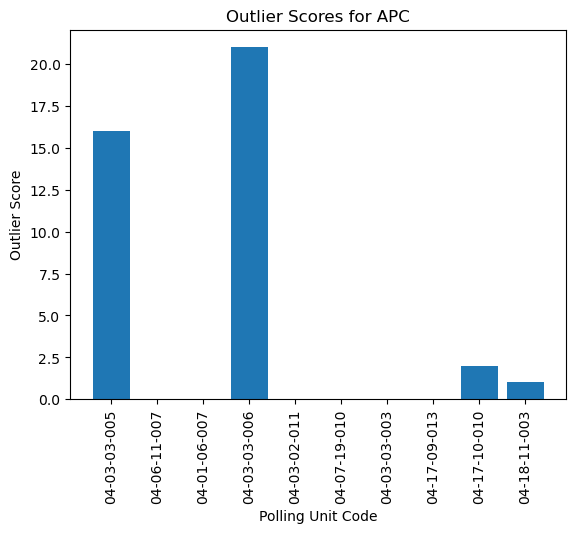

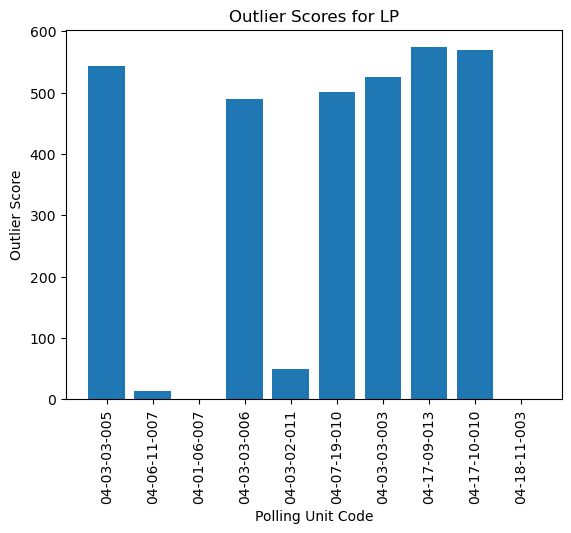

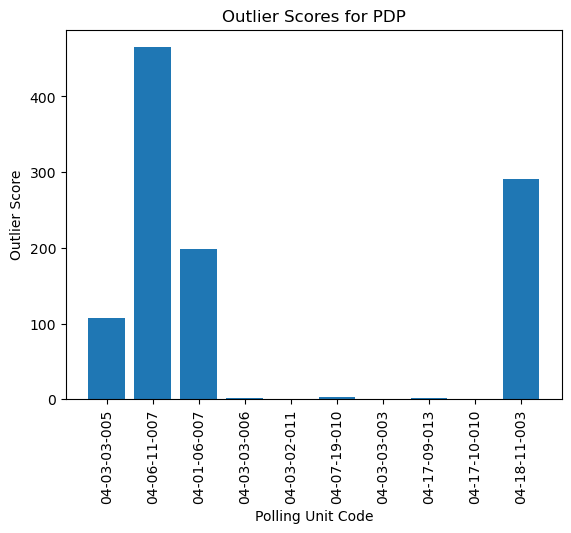

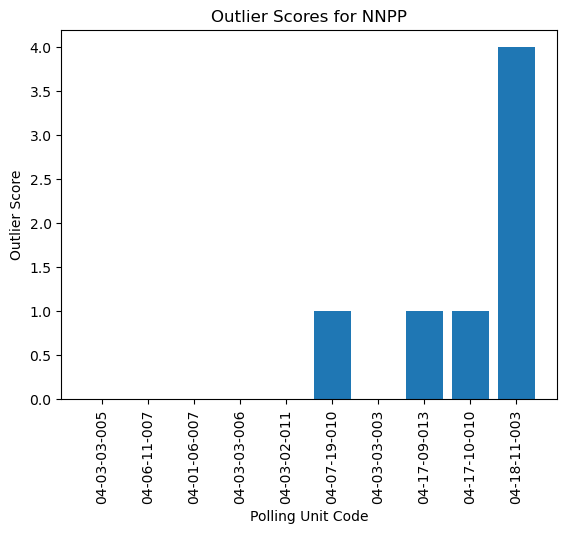

Visualizations saved as PNG files.


In [27]:
import matplotlib.pyplot as plt
    
    # Step 6: Visualization of outlier scores for each party
parties = ['APC', 'LP', 'PDP', 'NNPP']

for party in parties:
    plt.figure()
    plt.title(f'Outlier Scores for {party}')
    plt.bar(df_with_outliers['PU-Code'].head(10), df_with_outliers.head(10)[party])
    plt.xlabel('Polling Unit Code')
    plt.ylabel('Outlier Score')
    plt.xticks(rotation=90)
    
    # Save the figure as PNG
    plt.savefig(f'{party}_outlier_scores.png', bbox_inches='tight', dpi=300)
    
    # Display the plot
    plt.show()

print("Visualizations saved as PNG files.")


In [26]:
# Step 7: Write the report to a text file and print to console
report_content = "Methodology:\n"
report_content += "1. Dataset Preparation: Geocoding to add lat/long values.\n"
report_content += "2. Neighbour Identification: Calculated geodesic distances to find neighbours within 1 km radius.\n"
report_content += "3. Outlier Score Calculation: Calculated absolute differences in party votes compared to neighbours.\n"
report_content += "4. Sorting and Reporting: Sorted polling units by outlier scores to identify significant deviations.\n\n"

report_content += "Top 3 Outliers:\n"
for party in parties:
    report_content += f"\nParty: {party}\n"
    top3 = df_with_outliers.head(3)
    for index, row in top3.iterrows():
        report_content += f"Polling Unit: {row['PU-Code']}, Outlier Score: {row['Outlier Score']}, Votes: APC: {row['APC']}, LP: {row['LP']}, PDP: {row['PDP']}, NNPP: {row['NNPP']}\n"

# Write to file
with open('outlier_report.txt', 'w') as f:
    f.write(report_content)

# Print to console
print(report_content)

Methodology:
1. Dataset Preparation: Geocoding to add lat/long values.
2. Neighbour Identification: Calculated geodesic distances to find neighbours within 1 km radius.
3. Outlier Score Calculation: Calculated absolute differences in party votes compared to neighbours.
4. Sorting and Reporting: Sorted polling units by outlier scores to identify significant deviations.

Top 3 Outliers:

Party: APC
Polling Unit: 04-03-03-005, Outlier Score: 579.3834196891191, Votes: APC: 16, LP: 543, PDP: 107, NNPP: 0
Polling Unit: 04-06-11-007, Outlier Score: 551.6521739130435, Votes: APC: 0, LP: 13, PDP: 465, NNPP: 0
Polling Unit: 04-01-06-007, Outlier Score: 463.5, Votes: APC: 0, LP: 0, PDP: 199, NNPP: 0

Party: LP
Polling Unit: 04-03-03-005, Outlier Score: 579.3834196891191, Votes: APC: 16, LP: 543, PDP: 107, NNPP: 0
Polling Unit: 04-06-11-007, Outlier Score: 551.6521739130435, Votes: APC: 0, LP: 13, PDP: 465, NNPP: 0
Polling Unit: 04-01-06-007, Outlier Score: 463.5, Votes: APC: 0, LP: 0, PDP: 199, N